# Introduction

In this repository, we are trying to build a Convolutional Neural Network to classify the images of the **Fashion MNIST** dataset.


In [1]:
# Importing the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.callbacks import CSVLogger

2023-11-08 09:12:42.968026: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-08 09:12:42.995767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Importing the model

The model is part of the Tensorflow datasets. Importing it is as easy as doing: 

In [2]:
data = tf.keras.datasets.fashion_mnist

# Training and Test Sets

We divide our data into sets: training and testing.
The dataset has a preloaded function that does this job: `load_data()`

In [3]:
(training_images, training_labels), (test_images, test_labels) = data.load_data()

## Visualizing our data

Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


In [4]:
# Creating Class Names

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

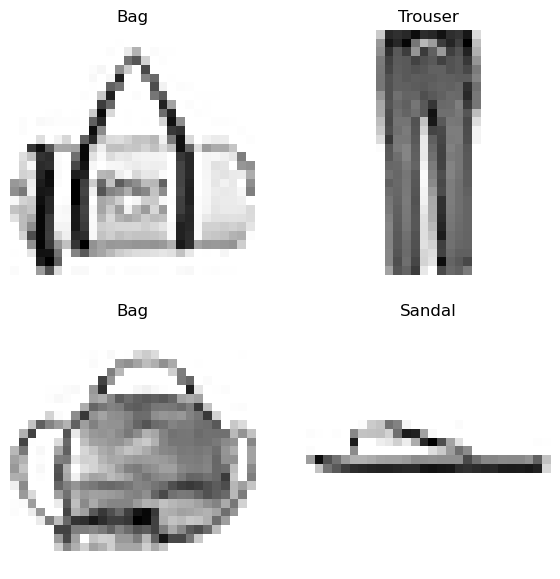

In [5]:
# Let's plot random images

plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(training_images)))
    plt.imshow(training_images[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[training_labels[rand_index]])
    plt.axis(False)

# Data Preprocessing

In [6]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

# Building the Model

In [7]:
# Create a Callback to save the training data in a csv file
csv_logger = CSVLogger('training.log', separator=',', append=False)

In [11]:
# Build
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
    input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Fit (for 50 epochs because we have all the time in the world :P )
history = model.fit(training_images, training_labels, epochs=30, callbacks=[csv_logger])

Epoch 1/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4392 - accuracy: 0.8418
Epoch 2/30
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2903 - accuracy: 0.8939
Epoch 3/30
1875/1875 [==============================] - 38s 21ms/step - loss: 0.2479 - accuracy: 0.9078
Epoch 4/30
1875/1875 [==============================] - 38s 21ms/step - loss: 0.2144 - accuracy: 0.9194
Epoch 5/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1865 - accuracy: 0.9308
Epoch 6/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1631 - accuracy: 0.9397
Epoch 7/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1408 - accuracy: 0.9475
Epoch 8/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1235 - accuracy: 0.9526
Epoch 9/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1078 - accuracy: 0.9594
Epoch 10/30
1875/1875 [==============================] - 43s 23m

# Evaluating our model

In [9]:
x = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3433 - accuracy: 0.9068


# Saving the model for further use

In [10]:
model.save("./fashion_mnist_conv.h5")

/home/yassine/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
